4 - Modules and PyPlot Graphics
===============================

Julia has a large number of *packages* that extends its functionality.  One of the most important for us is the PyPlot graphics package that provides a Julia interface to Python's *matplotlib* graphics library.  To access the functions in PyPlot you must first execute the following command. 

In [2]:
using PyPlot

You might see an information message about "recompiling [a] stale cashe file", but usually there should be no output unless and error occurs.

2D Graphics
-----------

The `plot` command draws a polygonal line by connecting x and y values supplied in two input vectors.  (Be patient, the plot might take a while to appear.)

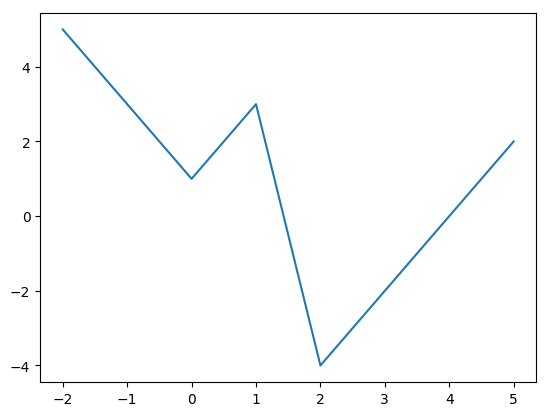

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32bd83a50>

In [3]:
x = [-2, 0, 1, 2, 5]
y = [ 5, 1, 3,-4, 2]
plot(x,y)

To plot the graph of a function, be sure to use enough points.  The `linspace` function provides a convenient way to generate *linearly spaced points*.

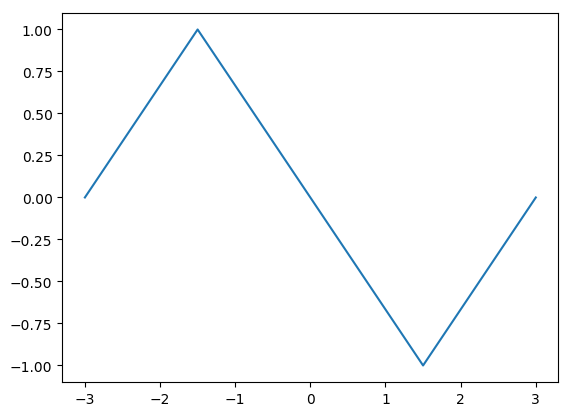

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x333551390>

In [29]:
x = linspace(-3, 3, 5) # only 5 points is not enough.
y = sin(pi*x)
plot(x, y)

In [ ]:
x = linspace(-3, 3, 400) # 400 points is plenty.
y = sin(π*x)
plot(x, y)

You can plot several functions on the same axes.  The `legend` function is often useful in this situation, and you will often want to use `LaTeX strings` for the labels. Use the `xlabel` and `ylabel` functions to label the axes, and the `grid` function to produce a grid.  The `savefig` function saves the plot to a file.

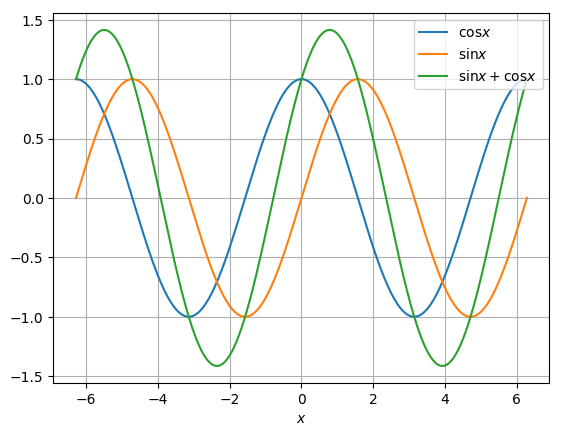

In [6]:
x = linspace(-2π, 2π, 400)
plot(x, cos(x), x, sin(x), x, sin(x)+cos(x))
legend((L"$\cos x$", L"$\sin x$", L"$\sin x+\cos x$"))
xlabel(L"$x$")
grid(true)
savefig("myplot.png")

You can plot relations as well as functions.

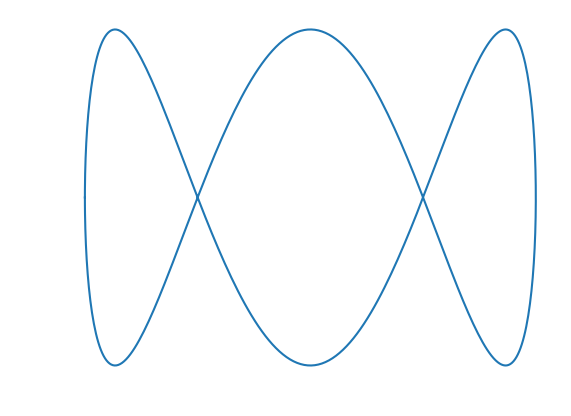

(-1.0999984501426794,1.0999674529962649,-1.0999232825580503,1.0999232825580503)

In [7]:
t = linspace(-π, π, 400)
plot(cos(t), sin(3t))
axis("off")

**Exercise.** Read the help for `plot`. Draw 5 points as red diamonds using the "rD" format string.  Then connect the points by green dashed line segments.


**Exercise.** Plot the 6th roots of 1 - 3i on an Argand diagram. Use the `axis("equal")` command to enforce an aspect ratio of 1:1.

The `quiver` function is used to plot a 2d vector field.

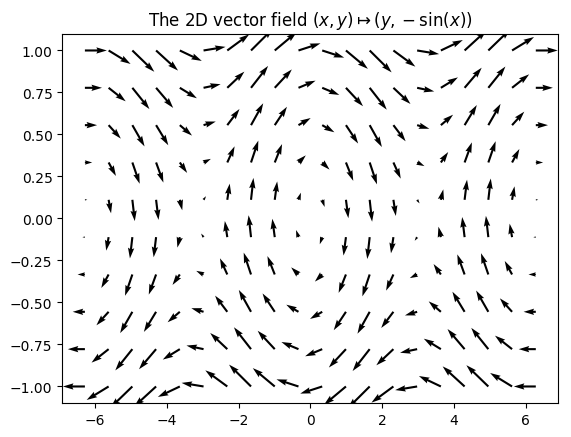

PyObject <matplotlib.text.Text object at 0x32f7d06d0>

In [8]:
x = linspace(-2π, 2π, 20)
y = linspace(-1.0, 1.0, 10)
u = broadcast((x,y)->y, x', y)
v = broadcast((x,y)->-sin(x), x', y)
quiver(x, y, u, v)
title(L"The 2D vector field $(x,y)\mapsto(y,-\sin(x))$")

Subplots
--------

The `subplot` function is used to create a grid of plots that are numbered in row-major order.

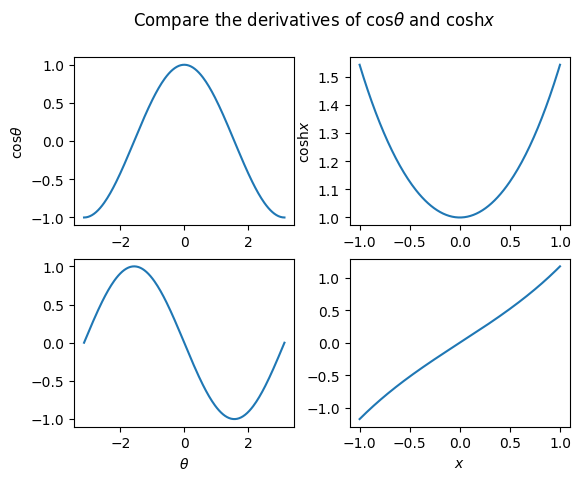

PyObject <matplotlib.text.Text object at 0x32bcb1ad0>

In [9]:
θ = linspace(-π, π, 200)
x = linspace(-1, 1, 200)
subplot(2, 2, 1)
plot(θ, cos(θ)); ylabel(L"$\cos\theta$")
subplot(2, 2, 2)
plot(x, cosh(x)); ylabel(L"$\cosh x$")
subplot(2, 2, 3)
plot(θ, -sin(θ)); xlabel(L"$\theta$")
subplot(2, 2, 4)
plot(x, sinh(x)); xlabel(L"$x$")
subplots_adjust(wspace=0.25)
suptitle(L"Compare the derivatives of $\cos\theta$ and $\cosh x$")

**Exercise.** Create a 2x1 array of plots showing the standard normal probability density function underneath the cumulative normal density function; you can plot the latter with the help of `erf(x)`. 

3D Graphics
-----------

Two standard methods to visualise a function of two variables are surface and contour plots.  The `plot_surface` and `contour` functions take two vectors of x and y values, as well as a matrix of Z values; to plot the surface z = f(x,y) we put `Z[i,j] = f(x[j], y[i])`.

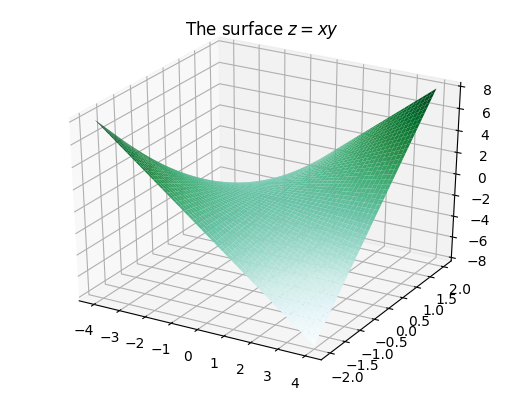

PyObject <matplotlib.text.Text object at 0x330072810>

In [16]:
x = linspace(-4, 4, 400)
y = linspace(-2, 2, 200)
Z = Float64[ x[j]*y[i] for i=1:200, j=1:400]
plot_surface(x, y, Z, cmap="BuGn")
title(L"The surface $z=xy$")

**Exercise.** The `cmap` argument to `plot_surface` sets a *colormap*.  Try out some of the other colormaps `autumn`, `bone`, `cool`, `copper`.  The `get_cmaps()` function returns the list of available colormaps.

A contour plot will usually require a colour bar.

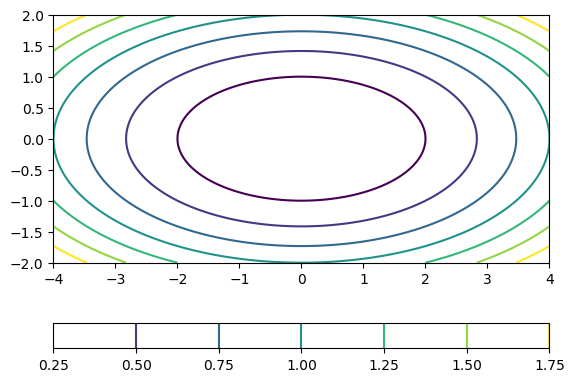

(-4.0,4.0,-2.0,2.0)

In [17]:
x = linspace(-4, 4, 800)
y = linspace(-2, 2, 400)
f(x,y) = x^2/4^2 + y^2/2^2
contour(x, y, f.(x',y))
colorbar(orientation="horizontal")
axis("scaled")

**Exercise.** The contour example used the *function-dot* syntax.  Given a function `f(x)` of one variable, if `x` is an array then `f.(x)` returns an array with the same dimensions as `x` by applying `f` elementwise.  This operation is equivalent to `broadcast(f, x)`.  Can you see how `f.(x',y)` works?  What does `f.(x,y)` return if `x` and `y` have the same dimensions?  What if `x` and `y` have different types?

**Exercise.** Create a surface plot of `g(x,y) = sin(x+y) * exp(-(x^2+y^2))`.  You will have to experiment to determine a suitable domain in the xy-plane.

The `plot3D` function works like `plot` but takes `x`, `y` and `z` arguments.

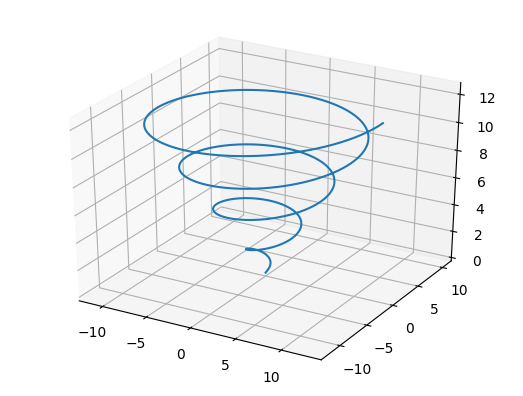

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x330645050>

In [18]:
t = linspace(0, 4π, 400)
x = t .* cos(2t)
y = t .* sin(2t)
z = t
plot3D(x, y, z)

The `contour3D` function plots contour lines in 3D and the `plot_wireframe` function produces a wireframe surface plot.  You can manipulate the viewing angle via the axis object.

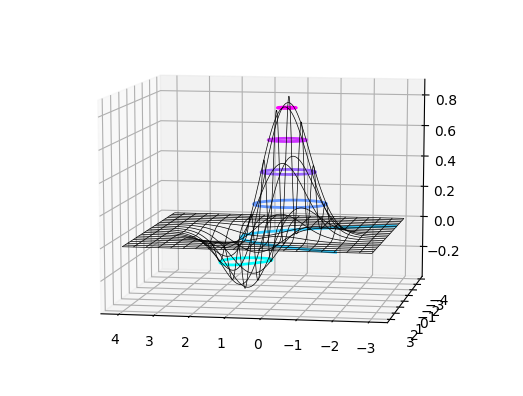

In [19]:
x = linspace(-3, 4, 200)
y = linspace(-4, 3, 200)
Z = broadcast( (x,y) -> exp(-x^2-2y^2) - exp(-(x-1)^2-(y+1/2)^2)/2, x', y)
plot_wireframe(x, y, Z, rstride=10, cstride=10, color="k", linewidth=1/2)
contour3D(x, y, Z, cmap="cool", linewidths=2)
ax = gca()
ax[:view_init](elev=10, azim=100)

Alternatively, you can project the contours onto a plane by setting the `offset` argument.

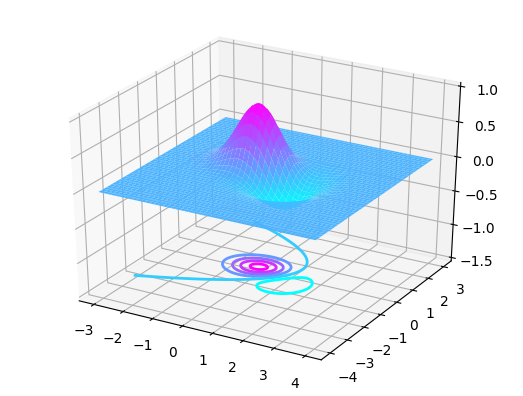

(-1.5,1)

In [20]:
x = linspace(-3, 4, 200)
y = linspace(-4, 3, 200)
Z = broadcast( (x,y) -> exp(-x^2-2y^2) - exp(-(x-1)^2-(y+1/2)^2)/2, x', y)
plot_surface(x, y, Z, cmap="cool")
contour3D(x, y, Z, linewidths=2, cmap="cool", offset=-1.5)
ax = gca()
ax[:set_zlim](-1.5,1)